#### Hi all.  🙋

#### Nice to meet you! 

#### We all know that feature engineering is the key to dynamically growing a model's performance in machine learning.

#### You will try a lot of thought and various methods when doing feature engineering! I'm going to suggest a lot of ways to reduce the trouble and process.

#### The methods I will introduce are both known and unfamiliar methods. I hope you will refer to them when conducting competitions on Kaggle in the future! 💯



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [2]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# data segmentation
X = train.drop('HeartDisease', axis=1)
y = train['HeartDisease']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) # train, valid 8:2 분할

In [4]:
# We need to duplicate the original state of our training data and test data.
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

# Functions that return training data and test data
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

In [5]:
# Store the numeric variable to be converted into a list
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS',
            'MaxHR', 'Oldpeak']

# Linear Trainsform

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Standardization</center></h1>
</div>

#### This is the most basic transformation method. 
#### It is a method that makes the mean 0 and the standard deviation 1 through a linear transformation!

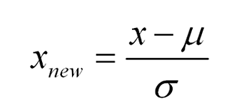

In [6]:
# Load Data
train_x, test_x = load_data()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

StandardScaler()

In [9]:
# Permuting each column after normalization
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

<div style="background-color:red;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">BAD Standardization</center></h1>
</div>

#### In this method, training data and test data are transformed according to the mean and standard deviation of different criteria. 

#### If the distribution of each data does not differ significantly from each other, it is not a problem. this method should not be used. 💥

In [10]:
train_x, test_x = load_data()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Normalize training data and test data respectively (bad example)
scaler_train = StandardScaler()
scaler_train.fit(train_x[num_cols])
train_x[num_cols] = scaler_train.transform(train_x[num_cols])

scaler_test = StandardScaler()
scaler_test.fit(test_x[num_cols])
test_x[num_cols] = scaler_test.transform(test_x[num_cols])

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Min-Max Scaling</center></h1>
</div>

#### This is a Min-Max Scaling method that converts the range taken by the variable value into a specific interval (between 0 and 1).

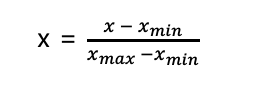

In [13]:
train_x, test_x = load_data()

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])

MinMaxScaler()

In [15]:
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

In [16]:
train_x.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

## The minimum value is 0 and the maximum value is 1.

,count,mean,std,min,25%,50%,75%,max
Age,734.000000,0.523133,0.190607,0.000000,0.392857,0.530612,0.653061,1.000000
RestingBP,734.000000,0.662718,0.092348,0.000000,0.600000,0.650000,0.700000,1.000000
Cholesterol,734.000000,0.329804,0.178388,0.000000,0.290630,0.368159,0.439469,1.000000
FastingBS,734.000000,0.217984,0.413158,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,734.000000,0.530090,0.184417,0.000000,0.410072,0.539568,0.669065,1.000000
Oldpeak,734.000000,0.397154,0.119065,0.000000,0.295455,0.363636,0.465909,1.000000


# Non-linear Transformation

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Log</center></h1>
</div>

#### It is recommended that the distribution of variables is not skewed to one side. 

#### For example, a variable representing a specific amount or number of times tends

#### to have a distribution that is biased in one direction, 

#### so log transformation is sometimes performed. And when the value is 0, 

#### log(x+1) transformation is often used because it cannot take the log as it is.

In [17]:
train_x, test_x = load_data()

In [18]:
x = train_x[num_cols]

In [19]:
# take log
x1 = np.log(x)
x1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
378,4.248495,4.941642,-inf,0.0,5.056246,0.693147
356,3.828641,4.744932,-inf,-inf,4.727388,0.405465
738,4.174387,5.075174,5.886104,-inf,5.017280,-0.223144
85,4.189655,4.941642,4.934474,-inf,4.543295,0.000000
427,4.077537,4.941642,-inf,-inf,4.762174,0.000000
...,...,...,...,...,...,...
835,3.988984,4.700480,5.476464,-inf,4.836282,1.029619
192,3.871201,4.867534,5.501258,-inf,5.075174,-inf
629,4.043051,4.852030,5.713733,-inf,5.068904,-inf
559,4.158883,4.897840,5.609472,-inf,4.624973,1.386294


In [20]:
# Add 1 and then take the logarithm
x2 = np.log1p(x)
x2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
378,4.262680,4.948760,0.000000,0.693147,5.062595,1.098612
356,3.850148,4.753590,0.000000,0.000000,4.736198,0.916291
738,4.189655,5.081404,5.888878,0.000000,5.023881,0.587787
85,4.204693,4.948760,4.941642,0.000000,4.553877,0.693147
427,4.094345,4.948760,0.000000,0.000000,4.770685,0.693147
...,...,...,...,...,...,...
835,4.007333,4.709530,5.480639,0.000000,4.844187,1.335001
192,3.891820,4.875197,5.505332,0.000000,5.081404,0.000000
629,4.060443,4.859812,5.717028,0.000000,5.075174,0.000000
559,4.174387,4.905275,5.613128,0.000000,4.634729,1.609438


In [21]:
# After taking the logarithm of the absolute value, add the original sign
x3 = np.sign(x) * np.log(np.abs(x))
x3

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
378,4.248495,4.941642,NaN,0.0,5.056246,0.693147
356,3.828641,4.744932,NaN,NaN,4.727388,0.405465
738,4.174387,5.075174,5.886104,NaN,5.017280,-0.223144
85,4.189655,4.941642,4.934474,NaN,4.543295,0.000000
427,4.077537,4.941642,NaN,NaN,4.762174,0.000000
...,...,...,...,...,...,...
835,3.988984,4.700480,5.476464,NaN,4.836282,1.029619
192,3.871201,4.867534,5.501258,NaN,5.075174,NaN
629,4.043051,4.852030,5.713733,NaN,5.068904,NaN
559,4.158883,4.897840,5.609472,NaN,4.624973,1.386294


<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Box-Cox Transform</center></h1>
</div>

#### In addition to the BOX-COX Transform, which is a generalized log transformation, 

#### there is also the Yeo-Johnson Transform that can be applied to variables with negative values. 
#### These transformations approximate a normal distribution after log transformation.

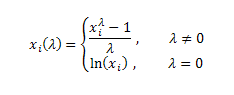

In [22]:
train_x, test_x = load_data()

In [23]:
# Storing variables that take only positive integer values ​​as conversion targets in a list
# Also, if missing values ​​are included, be careful because (~(train_x[c] <= 0.0)).all() should be used.
pos_cols = [c for c in num_cols if (train_x[c] > 0.0).all() and (test_x[c] > 0.0).all()]

In [24]:
## List of features with positive values
pos_cols

['Age', 'MaxHR']

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
pt = PowerTransformer(method='box-cox')
pt.fit(train_x[pos_cols])

PowerTransformer(method='box-cox')

In [27]:
# 변환 후의 데이터로 각 열을 치환
train_x[pos_cols] = pt.transform(train_x[pos_cols])
test_x[pos_cols] = pt.transform(test_x[pos_cols])

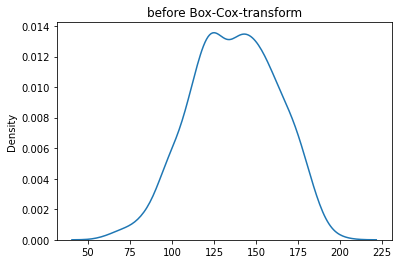

In [28]:
x = train.MaxHR.values
sns.kdeplot(x)
plt.title("before Box-Cox-transform")
plt.show()

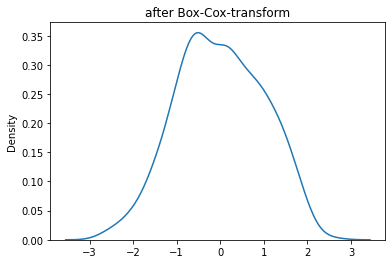

In [29]:
x = train_x.MaxHR.values
sns.kdeplot(x)
plt.title("after Box-Cox-transform")
plt.show()


## The existing data also has a form of a normal distribution, 
## so there is little difference between it and after the Box-Cox transformation.

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Yeo-Johnson Transform</center></h1>
</div>

#### Yeo-Johnson transform can also take negative values.

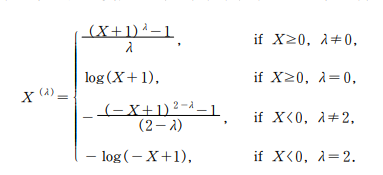

In [30]:
train_x, test_x = load_data()

In [31]:
from sklearn.preprocessing import PowerTransformer

In [32]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[num_cols])

PowerTransformer()

In [33]:
# 변환 후의 데이터로 각 열을 치환
train_x[num_cols] = pt.transform(train_x[num_cols])
test_x[num_cols] = pt.transform(test_x[num_cols])

In [34]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.Cholesterol,
    xbins=dict( # bins used for histogram
        start=-100,
        end=200
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='Cholesterol yeo-johnson Before',
    xaxis_title_text='Cholesterol',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.Cholesterol,
    xbins=dict( # bins used for histogram
        start=0,
        end=200

    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='Cholesterol yeo-johnson After',
    xaxis_title_text='Cholesterol',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## The spread distribution was forced to approximate the normal distribution.

# Setting TransForm

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Clipping</center></h1>
</div>

#### Numerical variables sometimes include outliers, but you can exclude outliers 
#### outside a certain range by setting upper and lower limits and replacing values 
#### outside the range with upper and lower limits. It is also a good idea to check the distribution first and then set the threshold.

In [36]:
train_x, test_x = load_data()

In [37]:
# Check 1%, 99% points of training data per column
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

p01
p99

Age             74.000
RestingBP      180.000
Cholesterol    408.340
FastingBS        1.000
MaxHR          185.670
Oldpeak          3.934
Name: 0.99, dtype: float64

In [38]:
# Values ​​below 1% point are clipped to 1% point, and values ​​above 99% point are clipped to 99% point.
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
test_x[num_cols] = test_x[num_cols].clip(p01, p99, axis=1)

In [39]:
after_MaxHR = train_x['MaxHR']
before_MaxHR = train['MaxHR']

after_RestingBP = train_x['RestingBP']
before_RestingBP = train['RestingBP']

#### MaxHR column before after comparison

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_MaxHR,
    xbins=dict( # bins used for histogram
        start=0,
        end=200,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='MaxHR Clipping Before',
    xaxis_title_text='MaxHR',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [41]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_MaxHR,
    xbins=dict( # bins used for histogram
        start=0,
        end=200
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='MaxHR Clipping After',
    xaxis_title_text='MaxHR',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## 0~80까지의 값들이 치환 되었다.

#### RestingBP column before after comparison

In [42]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = before_RestingBP,
    xbins=dict( # bins used for histogram
        start=0,
        end=560,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='RestingBP Clipping Before',
    xaxis_title_text='RestingBP',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [43]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = after_RestingBP,
    xbins=dict( # bins used for histogram
        start=0,
        end=560,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='RestingBP Clipping After',
    xaxis_title_text='RestingBP',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

#### If you look at the graph, you can clearly see that the values ​​are not spread widely but are clustered like a normal distribution.

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Rank Gauss</center></h1>
</div>

#### This is a method of converting numeric variables into ranks and then semi-forced normal 
#### distributions while maintaining the order. The method used by Kaggle Grandmaster 
#### Michael Jahrer was revealed in the 1st solution in Porto Seguro's Safe Driver Prediction competition. 
#### In particular, it is said to have better performance than general standardization as a transformation when building a model in a neural network.

In [44]:
train_x, test_x = load_data()

from sklearn.preprocessing import QuantileTransformer

In [45]:
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

QuantileTransformer(n_quantiles=100, output_distribution='normal',
                    random_state=0)

In [46]:
train_x[num_cols] = transformer.transform(train_x[num_cols])
test_x[num_cols] = transformer.transform(test_x[num_cols])

In [47]:
train_x[num_cols]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
378,1.876359,0.530220,-5.199338,5.199338,0.691030,1.051717
356,-0.781781,-1.051717,-5.199338,-5.199338,-0.885876,0.589456
738,1.304923,1.434200,1.942278,-5.199338,0.518834,0.037988
85,1.399657,0.530220,-0.842171,-5.199338,-1.690622,0.191052
427,0.530220,0.530220,-5.199338,-5.199338,-0.747859,0.191052
...,...,...,...,...,...,...
835,-0.050661,-1.366707,0.269066,-5.199338,-0.335333,1.549706
192,-0.619855,-0.088734,0.375793,-5.199338,0.799083,-0.799083
629,0.295415,-0.282216,1.276949,-5.199338,0.731217,-0.799083
559,1.194396,0.165327,0.816627,-5.199338,-1.335178,2.336095


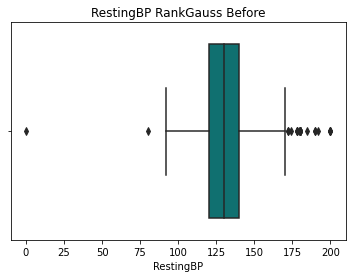

In [48]:
p = sns.boxplot(x=train.RestingBP, color = 'teal')
p.set_title("RestingBP RankGauss Before")
plt.show()

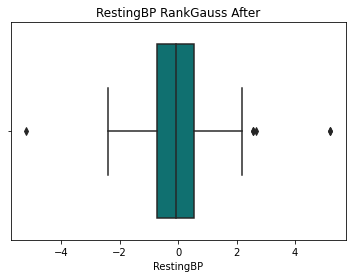

In [49]:
p = sns.boxplot(x=train_x.RestingBP, color = 'teal')
p.set_title("RestingBP RankGauss After")
plt.show()

#### The values ​​were semi-forced to be normally distributed. The impact of outliers is also expected to decrease.

# NEXT PLAN

#### The following tabular data conversion will deal with numeric conversion of category types. 
#### If you are interested in my kernel, please find the next category type conversion kernel as well.